In [1]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Google developer API key
from config import gkey


# Data Retrieval

In [3]:
# cleaned data from several sources
data_df = pd.read_excel("Resources/Project_State_Data_Final.xlsx")

#data_df.columns

In [4]:
# clean up columns
data_df["COPD Prevalence (%)"]=data_df['COPD State Population']/data_df['Total State Population']*100
data_df["Cancer Prevalence per 1000"]=data_df['Percent Lung']*10
del data_df['Asthma Sample Size']
del data_df['Asthma Prevalence Number']
del data_df['COPD Deaths']

del data_df['Total Surveyed for Lung Cancer per State']
del data_df["Lung & Bronchus Cancer Case Count"]
del data_df['Percent Lung']
del data_df["Unnamed: 0"]

#data_df.columns

# Establish Correlations between variables

In [4]:

data_dfcorr=data_df
data_corr = data_dfcorr.corr()
corr_df = []
corr_df=data_corr.unstack().sort_values()
corr_df = pd.DataFrame(corr_df).reset_index()
corr_df.columns=["var1", "var2", "r_corr" ]
corr_df=corr_df.loc[corr_df["r_corr"] != 1]

corr_df['abs']= abs(corr_df["r_corr"])
corr_df=corr_df.sort_values(["abs"],ascending=False )
corr_df



,var1,var2,r_corr,abs
505,COPD State Population,Total State Population,0.935383,0.935383
504,Total State Population,COPD State Population,0.935383,0.935383
503,COPD Medicare Hospitalizations,COPD State Population,0.932260,0.932260
502,COPD State Population,COPD Medicare Hospitalizations,0.932260,0.932260
501,Hazardous Days,Very Unhealthy Days,0.928705,0.928705
500,Very Unhealthy Days,Hazardous Days,0.928705,0.928705
499,Very Unhealthy Days,Unhealthy for Sensitive Groups Days,0.862058,0.862058
498,Unhealthy for Sensitive Groups Days,Very Unhealthy Days,0.862058,0.862058
497,Total State Population,COPD Medicare Hospitalizations,0.834038,0.834038
496,COPD Medicare Hospitalizations,Total State Population,0.834038,0.834038


In [5]:
# create a table with correlation coeficients for ASTHMA ('Asthma Prevalence (percent)') 

corr_df1=corr_df.loc[corr_df["var1"] == 'Asthma Prevalence (percent)']
corr_df1=corr_df1.sort_values(["abs"],ascending=False)
corr_df1

,var1,var2,r_corr,abs
441,Asthma Prevalence (percent),Cancer Prevalence per 1000,0.423242,0.423242
428,Asthma Prevalence (percent),COPD Prevalence (%),0.355264,0.355264
75,Asthma Prevalence (percent),Days PM10,-0.295226,0.295226
407,Asthma Prevalence (percent),Unhealthy Days,0.277791,0.277791
112,Asthma Prevalence (percent),Total State Population,-0.218965,0.218965
370,Asthma Prevalence (percent),Unhealthy for Sensitive Groups Days,0.202960,0.202960
144,Asthma Prevalence (percent),COPD Medicare Hospitalizations,-0.175760,0.175760
161,Asthma Prevalence (percent),COPD State Population,-0.154417,0.154417
164,Asthma Prevalence (percent),Percent Uninsured,-0.148679,0.148679
324,Asthma Prevalence (percent),COPD Medicare Hospitalizations (percent per 1000),0.122370,0.122370


In [6]:
# create a table with correlation coeficients for COPD Prevalence (%)

corr_df2=corr_df.loc[corr_df["var1"] == "COPD Prevalence (%)"]
corr_df2=corr_df2.sort_values(["abs"],ascending=False)
corr_df2

,var1,var2,r_corr,abs
494,COPD Prevalence (%),Percent Adult Smokers,0.825032,0.825032
483,COPD Prevalence (%),COPD Medicare Hospitalizations (percent per 1000),0.765229,0.765229
477,COPD Prevalence (%),"COPD Death Rate (percent per 100,000)",0.718868,0.718868
12,COPD Prevalence (%),Household Income,-0.547038,0.547038
432,COPD Prevalence (%),longitude,0.382928,0.382928
429,COPD Prevalence (%),Asthma Prevalence (percent),0.355264,0.355264
62,COPD Prevalence (%),Very Unhealthy Days,-0.322169,0.322169
67,COPD Prevalence (%),Unhealthy for Sensitive Groups Days,-0.318551,0.318551
92,COPD Prevalence (%),Hazardous Days,-0.255523,0.255523
98,COPD Prevalence (%),Max AQI,-0.241001,0.241001


In [7]:
# create a table with correlation coeficients for 'COPD Medicare Hospitalizations (percent per 1000)'

corr_df3=corr_df.loc[corr_df["var1"] == "COPD Medicare Hospitalizations (percent per 1000)"]
corr_df3=corr_df3.sort_values(["abs"],ascending=False)
corr_df3

,var1,var2,r_corr,abs
482,COPD Medicare Hospitalizations (percent per 1000),COPD Prevalence (%),0.765229,0.765229
475,COPD Medicare Hospitalizations (percent per 1000),Percent Adult Smokers,0.660454,0.660454
471,COPD Medicare Hospitalizations (percent per 1000),longitude,0.540312,0.540312
452,COPD Medicare Hospitalizations (percent per 1000),COPD Medicare Hospitalizations,0.449310,0.449310
443,COPD Medicare Hospitalizations (percent per 1000),"COPD Death Rate (percent per 100,000)",0.423633,0.423633
435,COPD Medicare Hospitalizations (percent per 1000),COPD State Population,0.383953,0.383953
38,COPD Medicare Hospitalizations (percent per 1000),Household Income,-0.375365,0.375365
60,COPD Medicare Hospitalizations (percent per 1000),Very Unhealthy Days,-0.324926,0.324926
64,COPD Medicare Hospitalizations (percent per 1000),Days PM10,-0.319987,0.319987
85,COPD Medicare Hospitalizations (percent per 1000),Unhealthy for Sensitive Groups Days,-0.259485,0.259485


In [8]:
# create a table with correlation coeficients for 'COPD Death Rate (percent per 100,000)'

corr_df4=corr_df.loc[corr_df["var1"] == 'COPD Death Rate (percent per 100,000)']
corr_df4=corr_df4.sort_values(["abs"],ascending=False)
corr_df4

,var1,var2,r_corr,abs
487,"COPD Death Rate (percent per 100,000)",Percent Adult Smokers,0.783386,0.783386
476,"COPD Death Rate (percent per 100,000)",COPD Prevalence (%),0.718868,0.718868
3,"COPD Death Rate (percent per 100,000)",Household Income,-0.708786,0.708786
16,"COPD Death Rate (percent per 100,000)",Unhealthy for Sensitive Groups Days,-0.520855,0.520855
456,"COPD Death Rate (percent per 100,000)",Percent Uninsured,0.457773,0.457773
24,"COPD Death Rate (percent per 100,000)",Unhealthy Days,-0.424898,0.424898
442,"COPD Death Rate (percent per 100,000)",COPD Medicare Hospitalizations (percent per 1000),0.423633,0.423633
29,"COPD Death Rate (percent per 100,000)",Cancer Prevalence per 1000,-0.423464,0.423464
45,"COPD Death Rate (percent per 100,000)",Very Unhealthy Days,-0.364102,0.364102
53,"COPD Death Rate (percent per 100,000)",Max AQI,-0.354310,0.354310


In [9]:
# create a table with correlation coeficients for lung Cancer Prevalence

corr_df5=corr_df.loc[corr_df["var1"] == "Cancer Prevalence per 1000"]
corr_df5=corr_df5.sort_values(["abs"],ascending=False)
corr_df5

,var1,var2,r_corr,abs
473,Cancer Prevalence per 1000,Unhealthy Days,0.581464,0.581464
464,Cancer Prevalence per 1000,Household Income,0.520231,0.520231
458,Cancer Prevalence per 1000,Unhealthy for Sensitive Groups Days,0.459102,0.459102
22,Cancer Prevalence per 1000,COPD State Population,-0.442535,0.442535
28,Cancer Prevalence per 1000,"COPD Death Rate (percent per 100,000)",-0.423464,0.423464
440,Cancer Prevalence per 1000,Asthma Prevalence (percent),0.423242,0.423242
35,Cancer Prevalence per 1000,COPD Medicare Hospitalizations,-0.383842,0.383842
37,Cancer Prevalence per 1000,Percent Uninsured,-0.376326,0.376326
48,Cancer Prevalence per 1000,Percent Adult Smokers,-0.360302,0.360302
51,Cancer Prevalence per 1000,Total State Population,-0.358626,0.358626


In [10]:
# Plots

In [5]:
#data_df.columns

The r-squared is: -0.5940499642355414


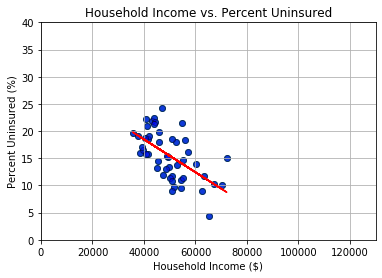

In [6]:
x_values = data_df["Household Income"]
y_values = data_df["Percent Uninsured"]

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq, (80000,35),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Household Income vs. Percent Uninsured")
plt.ylabel("Percent Uninsured (%)")
plt.xlabel("Household Income ($)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,130000)
plt.ylim(0,40)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/Income_vs_Unninsure.png')

plt.show()

The r-squared is: -0.547037899440438


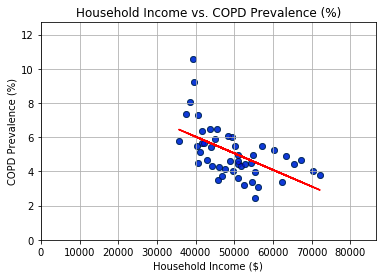

In [7]:
x_values = data_df["Household Income"]
y_values = data_df["COPD Prevalence (%)"]
x_max = max(x_values)*1.2
y_max = max(y_values)*1.2

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(80000,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Household Income vs. COPD Prevalence (%)")
plt.ylabel("COPD Prevalence (%)")
plt.xlabel("Household Income ($)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,x_max)
plt.ylim(0,y_max)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/Income_vs_Copdprevalence.png')

plt.show()

In [11]:
data_df.columns

Index(['State', 'Household Income', 'Total State Population',
       'Percent Uninsured', 'Percent Adult Smokers',
       'Asthma Prevalence (percent)', 'COPD State Population',
       'COPD Medicare Hospitalizations',
       'COPD Medicare Hospitalizations (percent per 1000)',
       'COPD Death Rate (percent per 100,000)', 'Good Days', 'Moderate Days',
       'Unhealthy for Sensitive Groups Days', 'Unhealthy Days',
       'Very Unhealthy Days', 'Hazardous Days', 'Max AQI', 'Days Ozone',
       'Days PM2.5', 'Days PM10', 'latitude', 'longitude',
       'COPD Prevalence (%)', 'Cancer Prevalence per 1000'],
      dtype='object')

250
24.26086957
The r-squared is: -0.37632577008363155


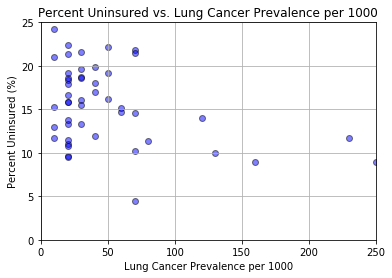

In [13]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Percent Uninsured"]
print(max(x_values))
print( max(y_values))

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Percent Uninsured vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Percent Uninsured (%)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,250)
plt.ylim(0,25)
rsq=rvalue*rvalue
# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/uninsured_vs_CancerPrevalence.png')

plt.show()


## Heatmap 

In [193]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)
data_df.head(1)

,State,County,County Population,Household Income,Percent Adult Smokers,Percent Uninsured,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,...,Max AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude,Cancer Prevalence per 1000
0,Alabama,Baldwin,200111,49626,19,17,247,32,0,0,...,87,0,0,221,0,58,0,30.659218,-87.746067,4.967243


In [194]:
# Store 'Lat' and 'Lng' into  locations 
locations = data_df[["Latitude", "Longitude"]].astype(float)

# Convert Poverty Rate to float and store
income_rate = data_df["Household Income"].astype(float)
smokers_rate = data_df["Percent Adult Smokers"].astype(float)
cancer_rate = data_df["Cancer Prevalence per 1000"].astype(float)





In [228]:
# Create a  Heatmap layer
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=income_rate, 
                                 dissipating=False, max_intensity=100000,
                                 point_radius = 0.6)
fig.add_layer(heat_layer)
plt.savefig(f'../output_plots/heatmap.png')
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [225]:
# Create a poverty Heatmap layer
fig = gmaps.figure()
heat_layer2 = gmaps.heatmap_layer(locations, weights=cancer_rate, 
                                 dissipating=False, max_intensity=10,
                                 point_radius = 0.6, gradient=["white","blue"])
fig.add_layer(heat_layer2)

fig


Figure(layout=FigureLayout(height='420px'))

In [227]:
# Create a combined map
fig = gmaps.figure()

fig.add_layer(heat_layer2)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))